In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt

## 1. División de Datos en Train, Val y Test:

In [2]:
# Cargar los datos
data = pd.read_csv('california_housing_train.csv')

# Eliminar la columna 'longitude' del DataFrame
data = data.drop('longitude', axis=1)

In [3]:

# Dividir los datos en variables independientes (X) y dependiente (y)
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

In [4]:
# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 2. Regresión Lineal y Árbol de Decisiones

In [5]:
# Modelo de Regresión Lineal
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

In [6]:
# Modelo de Árbol de Decisión
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

In [7]:
# Calcular métricas para Regresión Lineal
r2_ajustada_linear = 1 - (1 - r2_score(y_test, y_pred_linear)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
mape_linear = mean_absolute_percentage_error(y_test, y_pred_linear)

In [8]:
# Calcular métricas para Árbol de Decisión
r2_ajustada_tree = 1 - (1 - r2_score(y_test, y_pred_tree)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))
mape_tree = mean_absolute_percentage_error(y_test, y_pred_tree)

In [9]:
# Imprimir métricas para Regresión Lineal
print(f'Regresión Lineal - R2 Ajustada: {r2_ajustada_linear}')
print(f'Regresión Lineal - RMSE: {rmse_linear}')
print(f'Regresión Lineal - MAPE: {mape_linear}')

# Imprimir métricas para Árbol de Decisión
print(f'Árbol de Decisión - R2 Ajustada: {r2_ajustada_tree}')
print(f'Árbol de Decisión - RMSE: {rmse_tree}')
print(f'Árbol de Decisión - MAPE: {mape_tree}')

Regresión Lineal - R2 Ajustada: 0.604033249293572
Regresión Lineal - RMSE: 73788.41081746604
Regresión Lineal - MAPE: 0.32765952635409296
Árbol de Decisión - R2 Ajustada: 0.39235267682028074
Árbol de Decisión - RMSE: 91408.08102583002
Árbol de Decisión - MAPE: 0.35049032073091557


## 3. Análisis de Correlación: 

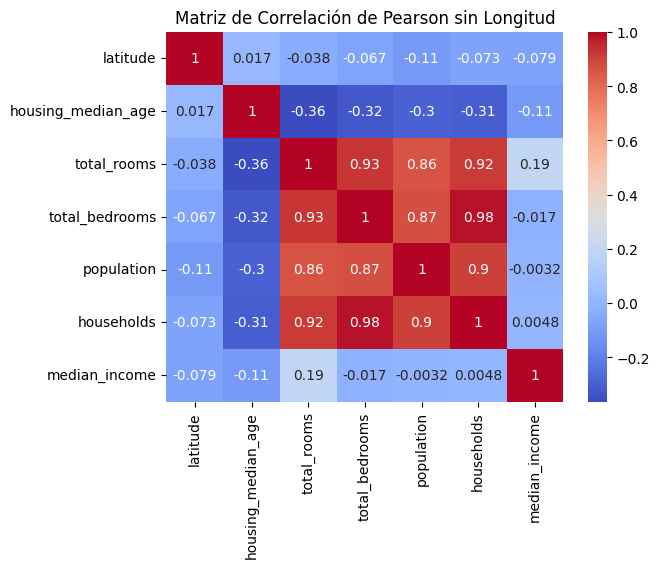

In [10]:
# Matriz de correlación de Pearson sin la variable 'longitude'
correlation_matrix = X_train.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación de Pearson sin Longitud')
plt.show()

## 3. Histogramas:]

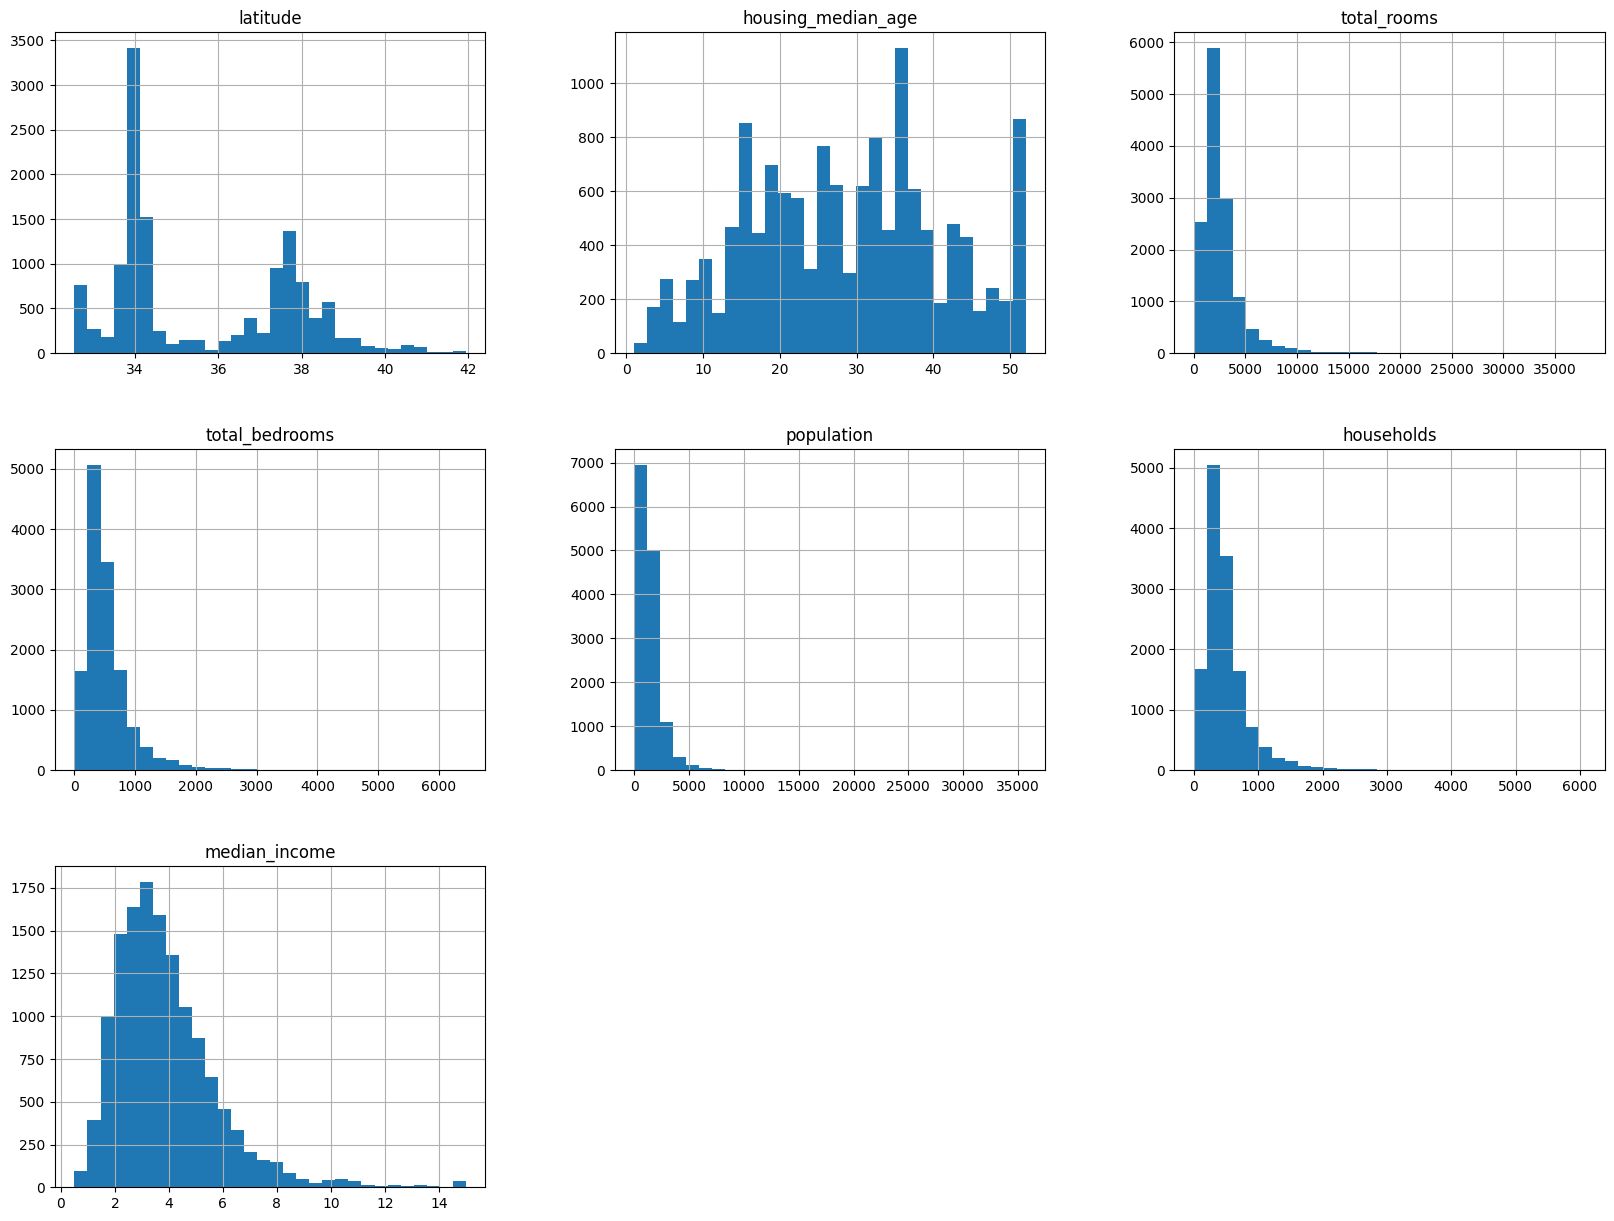

In [11]:
# Histogramas de las variables
X_train.hist(bins=30, figsize=(20, 15))
plt.show()

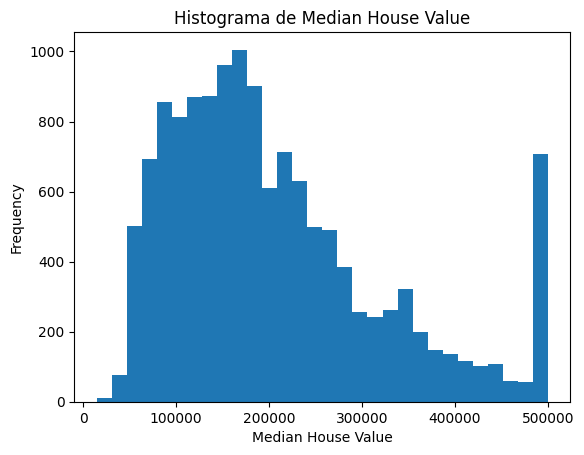

In [12]:
# Histograma de la variable 'median_house_value'
plt.hist(y_train, bins=30)
plt.title('Histograma de Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

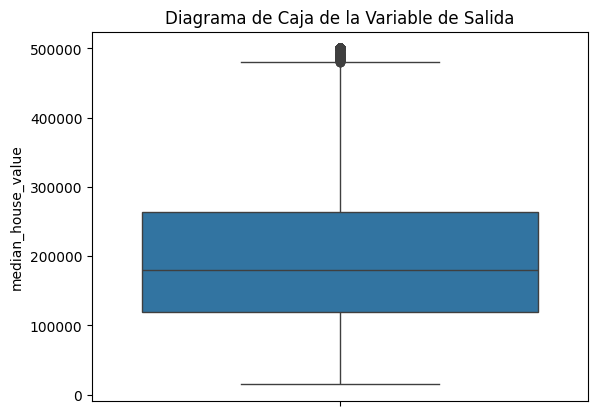

In [13]:
# Diagrama de caja de la variable de salida
sns.boxplot(y=y_train)
plt.title('Diagrama de Caja de la Variable de Salida')
plt.show()

In [14]:
# Comparación eliminando una variable (latitud)
X_train_no_latitude = X_train.drop('latitude', axis=1)
X_test_no_latitude = X_test.drop('latitude', axis=1)

linear_model_no_latitude = LinearRegression()
linear_model_no_latitude.fit(X_train_no_latitude, y_train)
y_pred_linear_no_latitude = linear_model_no_latitude.predict(X_test_no_latitude)

r2_ajustada_no_latitude = 1 - (1 - r2_score(y_test, y_pred_linear_no_latitude)) * (len(y_test) - 1) / (len(y_test) - X_test_no_latitude.shape[1] - 1)
rmse_no_latitude = np.sqrt(mean_squared_error(y_test, y_pred_linear_no_latitude))
mape_no_latitude = mean_absolute_percentage_error(y_test, y_pred_linear_no_latitude)

print(f'Regresión Lineal sin Latitud - R2 Ajustada: {r2_ajustada_no_latitude}')
print(f'Regresión Lineal sin Latitud - RMSE: {rmse_no_latitude}')
print(f'Regresión Lineal sin Latitud - MAPE: {mape_no_latitude}')

Regresión Lineal sin Latitud - R2 Ajustada: 0.5958563272979697
Regresión Lineal sin Latitud - RMSE: 74557.39011222056
Regresión Lineal sin Latitud - MAPE: 0.33360798585032436


In [15]:

# Validación cruzada para verificar overfitting y underfitting
cv_scores_r2 = cross_val_score(linear_model, X_train, y_train, cv=5, scoring='r2')
cv_scores_rmse = np.sqrt(-cross_val_score(linear_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
cv_scores_mae = cross_val_score(linear_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
cv_scores_mape = cross_val_score(linear_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_percentage_error')

print(f'Validación Cruzada R2: {cv_scores_r2.mean()}')
print(f'Validación Cruzada RMSE: {cv_scores_rmse.mean()}')
print(f'Validación Cruzada MAE: {-cv_scores_mae.mean()}')
print(f'Validación Cruzada MAPE: {-cv_scores_mape.mean()}')

Validación Cruzada R2: 0.5677871930621968
Validación Cruzada RMSE: 75965.63290221158
Validación Cruzada MAE: 55807.202517949314
Validación Cruzada MAPE: 0.33843778947387165
